<img src="Figures/top_ML.png" alt="Drawing" style="width: 1000px;"/>

# Regresión 

### Contenido

1. Regresión lineal
2. Regresión lineal con sklearn
3. Métricas evaluación
4. Regularización
5. Visualización

## 1. Regresión lineal

**Notación para el modelo de regresión lineal**

En un modelo lineal, tendremos un prámetro $\textbf{y}$ que depende de manera lineal de varios covariantes $\textbf{x}_i$:

$$ \textbf{y}  =  a_1 \textbf{x}_1  + \dots + a_m \textbf{x}_{m} $$

Los términos $a_i$ serán los *parametros* del modelo o *coeficientes*.

Si lo escribimos de forma matricial:

$$ \textbf{y}  = X \textbf{w}$$

donde $$ \textbf{y} = \left( \begin{array}{c} y_1 \\ y_2 \\ \vdots \\ y_n \end{array} \right), 
 X = \left( \begin{array}{c} x_{11}  \dots x_{1m} \\ x_{21}  \dots x_{2m}\\ \vdots \\ x_{n1}  \dots x_{nm} \end{array} \right),
 \textbf{w} = \left( \begin{array}{c} a_1 \\ a_2 \\ \vdots \\ a_m \end{array} \right) $$
 
En un modelo de regresión lineal que solo dependa de una variable, tendremos:

$$ \textbf{y}  =  a_0+ a_1 \textbf{x}_1 $$

Con un parámetro $a_0$ llamado constante o corte con el eje de ordenadas.

Si tenemos una regresión multivariable, tendremos:
$$ \textbf{y} = a_1 \textbf{x}_1 + \dots + a_m \textbf{x}_m = X \textbf{w} $$


Vamos a ver algun ejemplo de manera gráfica

In [2]:
import matplotlib.pylab as plt
import numpy as np
import seaborn as sns
sns.set_style("whitegrid")
sns.set_context("notebook", font_scale=1, rc={"lines.linewidth": 2,'font.family': [u'times']})
%matplotlib inline 
plt.rc('font', size=12) 
plt.rc('figure', figsize = (12, 5))

Si creamos un conjunto de datos "aleatorios", y los graficamos:

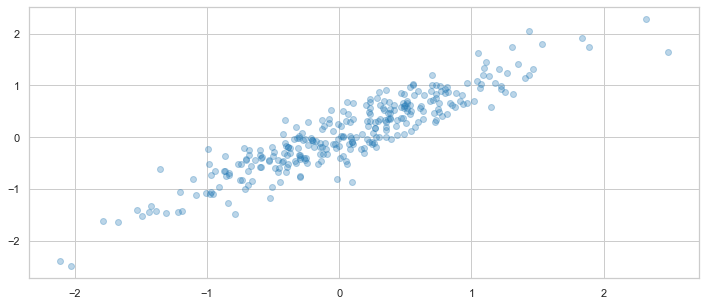

In [3]:
X1 = np.random.randn(300, 2)  # Aleatorios siguiendo una Gauss
A = np.array([[0.6, .4], [.4, 0.6]]) # Aplicació lineal per fer-la "una funció lineal"
X2 = np.dot(X1, A)
plt.plot(X2[:, 0], X2[:, 1], "o", alpha=0.3) 

Está claaro que hay una cierta correlación entre ellos que podríamos ver con este modelo:

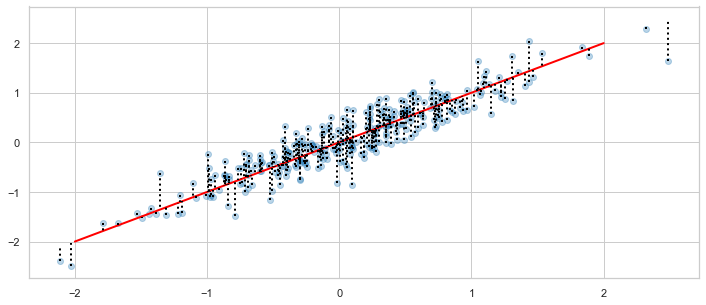

In [4]:
model=[0+1*x for x in np.arange(-2,3)] # un possible model

plt.plot(X2[:, 0], X2[:, 1], "o", alpha=0.3);
plt.plot(np.arange(-2,3), model,'r'); 
for xi, yi in zip(X2[:, 0],X2[:, 1]):
    plt.plot([xi]*2, [yi, 0+1*xi], "k:") # ilusrtrar errores
plt.show()


Pero, ¿Cuál es el modelo que mejor se ajusta a estos datos? 

¿Cómo encontramos los parámetros o coeficientes de la siguiente ecuación?

$$ \textbf{y}  =  a_0+ a_1 \textbf{x}_1 $$

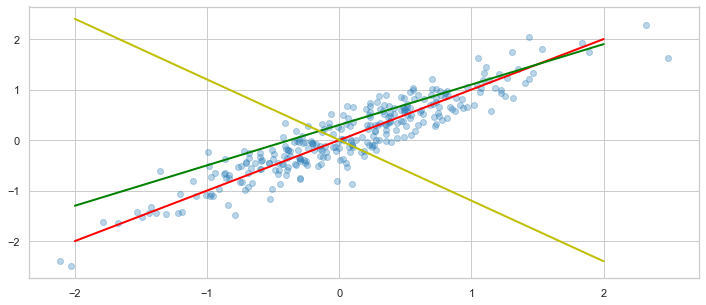

In [6]:
plt.plot(X2[:, 0], X2[:, 1], "o", alpha=0.3);
#más modelos!!
model1=[0+1*x for x in np.arange(-2,3)]
model2=[0.3+0.8*x for x in np.arange(-2,3)]
model3=[0-1.2*x for x in np.arange(-2,3)]
plt.plot(np.arange(-2,3), model1,'r')
plt.plot(np.arange(-2,3), model2,'g')
plt.plot(np.arange(-2,3), model3,'y')


El objetivo siempre será minimizar la suma del cuadrado de la distancia entro los puntos reales y el valor de la funcióm

Si tenemos los datos $(\textbf{x},\textbf{y})$, queremos minimizar:

$$ ||a_0 + a_1 \textbf{x} -  \textbf{y} ||^2_2 = \sum_{j=1}^n (a_0+a_1 x_{j} -  y_j )^2,$$ 

Esta expresión, se conoce como **sum of squared errors of prediction (SSE)**.

La manera más fàcil de encontrar estos dos parámetros es usando el algoritmo OLS (*Ordinary Least Squares*)

$$\textbf{y} = a_0+a_1 \textbf{x}$$



###  1.1 OLS

Veamos un ejemplo:

In [5]:
x = np.array([2.2, 4.3, 5.1, 5.8, 6.4, 8.0])
x_train = x.reshape(1,-1) 

y = np.array([0.4, 10.1, 14.0, 10.9, 15.4, 18.5])
y_train = y.reshape(1,-1)

Optimization terminated successfully.
         Current function value: 21.375000
         Iterations: 79
         Function evaluations: 153

SSE =  21.375000000874127

Modelo obtenido:
 -4.35 + 3.0 x


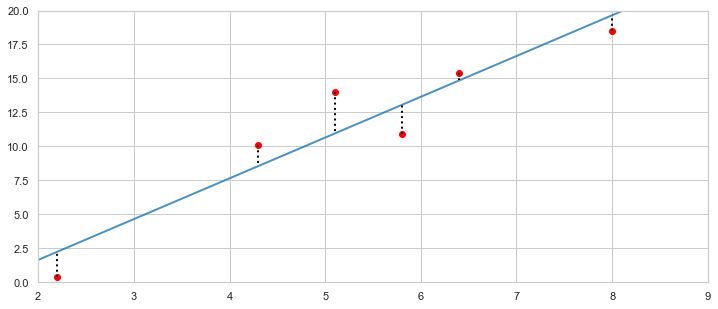

In [6]:
# Minimizar las distancias
from scipy.optimize import fmin

sse = lambda b, x, y: np.sum((y - b[0] - b[1]*x) ** 2) # Guardar la SSE

b0,b1 = fmin(sse, [0,1], args=(x,y)); # Minimizar usando 0 y 1 como valores iniciales de los coeficientes

plt.plot(x, y, 'ro')
plt.plot([0,10], [b0, b0+b1*10], alpha=0.8) # linia regresión
for xi, yi in zip(x,y):
    plt.plot([xi]*2, [yi, b0+b1*xi], "k:") # ilusrtrar errores
plt.xlim(2, 9); plt.ylim(0, 20)

print('\nSSE = ', np.sum((y - b0 - b1*x) ** 2))
print('\nModelo obtenido:\n',round(b0,2),'+',round(b1,2),'x')

También podríamos minimizar otros valores como  **suma del valor absoluto de las diferencias**. 

Optimization terminated successfully.
         Current function value: 10.162463
         Iterations: 39
         Function evaluations: 77

SSE =  33.54725815618215
Valores Absolutos =  10.162463486362249

Modelo obtenido:
 0.0 + 2.31 x


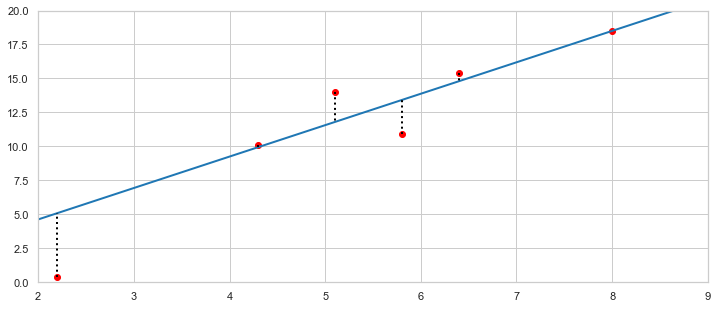

In [7]:
# Minimizar valores absolutos
from scipy.optimize import fmin

sabs = lambda b, x, y: np.sum(np.abs(y - b[0] - b[1]*x)) 

b0,b1 = fmin(sabs, [0,1], args=(x,y)) # Minimizar valores absolutos ahora

plt.plot(x, y, 'ro')
plt.plot([0,10], [b0, b0+b1*10]) # linia regresión
for xi, yi in zip(x,y):
    plt.plot([xi]*2, [yi, b0+b1*xi], "k:") # ilusrtrar errores
plt.xlim(2, 9); plt.ylim(0, 20) 

print('\nSSE = ', np.sum((y - b0 - b1*x) ** 2))
print('Valores Absolutos = ', np.sum(np.abs(y - b0 - b1*x)))
print('\nModelo obtenido:\n',round(b0,2),'+',round(b1,2),'x')

En este caso, penalizamos menos los valores lejanos.

Ventajas OLS

+ Fácil de calcular computacionalmente cuando son datasets pequeños. Para conjuntos más grandes el cálculo de una inversa provoca un aumento del tiempo de cómputo.
+ Fácil de interpretar

Y el modelo obtenido es:

$$\widehat{\textbf{y}} = \widehat{a}_0+\widehat{a}_1 \textbf{x}$$

Los sombreros indican que són valores estimados

### 1.2 Gradient Descent

Otra manera de calcular los coeficientes es el método conocido como Gradient Descent que también se ha visto en otros algoritmos de machine learning.

Este proceso consta de los siguientes pasos:
* Calcular el error (MSE) del modelo con un parámetro inicial:
$$MSE(a_{1})=\frac{1}{n} \sum_{i=1}^n (\widehat{y}^i-y^i)^2,$$ 
* Calcular la derivada del error en aquel punto.
$$\frac{d}{da_{1}}MSE(a_{1}) $$
* Actualizar el parámetro moviendolo $ \alpha $ veces la dirección de la derivada (*learning rate*)
$$a_{1} = a_{1} - \alpha \frac{d}{da_{1}}MSE(a_{1})$$

El objetivo es buscar el mínimo del error. 

![ChessUrl](https://s3.amazonaws.com/dq-content/237/single_var_operation.gif "Gradient")


Como ejemplo se podría implementar con este código:

In [8]:
def derivada(a1, xi_list, yi_list):
    len_data=len(xi_list)
    deriv=0
    for value in range(len_data):
        it=xi_list[value]*(a1*xi_list[value]-yi_list[value])
        deriv+=it
    return (2/len_data)*deriv

def gradient_descent(xi_list, yi_list, max_iterations, alpha, a1_initial):
    a1_list = [a1_initial]

    for i in range(0, max_iterations):
        a1 = a1_list[i]
        deriv = derivada(a1, xi_list, yi_list)
        a1_new = a1 - alpha*deriv
        a1_list.append(a1_new)
    return(a1_list)

In [9]:
param_iterations = gradient_descent(x, y, 200, 0.3, 2)
final_param = param_iterations[-1]
print('\nModelo obtenido:\n','0','+',round(final_param,2),'x')


Modelo obtenido:
 0 + -2.9941065474526456e+249 x


Si se trabaja con más variables, el metodo es parecido:

![ChessUrl](https://s3.amazonaws.com/dq-content/237/surface_plot.gif "Gradient mas parametros")


In [10]:
def a1_derivative(a0, a1, xi_list, yi_list):
    len_data = len(xi_list)
    error = 0
    for i in range(0, len_data):
        error += xi_list[i]*(a0 + a1*xi_list[i] - yi_list[i])
    deriv = 2*error/len_data
    return deriv

def a0_derivative(a0, a1, xi_list, yi_list):
    len_data = len(xi_list)
    error = 0
    for i in range(0, len_data):
        error += (a0 + a1*xi_list[i] - yi_list[i])
    deriv = 2*error/len_data
    return deriv

def gradient_descent(xi_list, yi_list, max_iterations, alpha, a1_initial, a0_initial):
    a1_list = [a1_initial]
    a0_list = [a0_initial]

    for i in range(0, max_iterations):
        a1 = a1_list[i]
        a0 = a0_list[i]
        
        a1_deriv = a1_derivative(a0, a1, xi_list, yi_list)
        a0_deriv = a0_derivative(a0, a1, xi_list, yi_list)
        
        a1_new = a1 - alpha*a1_deriv
        a0_new = a0 - alpha*a0_deriv
        
        a1_list.append(a1_new)
        a0_list.append(a0_new)
    return(a0_list, a1_list)

a0_params, a1_params = gradient_descent(x, y, 200, .3, 2, 0)
print('\nModelo obtenido:\n',round(a0_params[-1],2),'+',round(a1_params[-1],2),'x')


Modelo obtenido:
 -1.9300887475005207e+251 + -1.137040441478693e+252 x


### 2.Regresión lineal con Sklearn

Por suerte no tenemos que desarrolar estos algoritmos nosotros des de cero. Para esto están las librerías de machine learning ya hechas!!

Por ejemplo, veamos como de fácil es crear un modelo de regresión lineal en Sklearn, cargando un dataset de ejemplo de la librería:

In [11]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn import datasets, linear_model
from sklearn.metrics import mean_squared_error, r2_score

# Cargar dataset ejemplo
diabetes_X, diabetes_y = datasets.load_diabetes(return_X_y=True)
diabetes_X = diabetes_X[:, np.newaxis, 2]
diabetes_X_train = diabetes_X[:-20]
diabetes_X_test = diabetes_X[-20:]
diabetes_y_train = diabetes_y[:-20]
diabetes_y_test = diabetes_y[-20:]

Ahora, para ejecutar el modelo, es así de fácil:

a1 es: 
 [938.23786125]
a0 es: 
 152.91886182616167


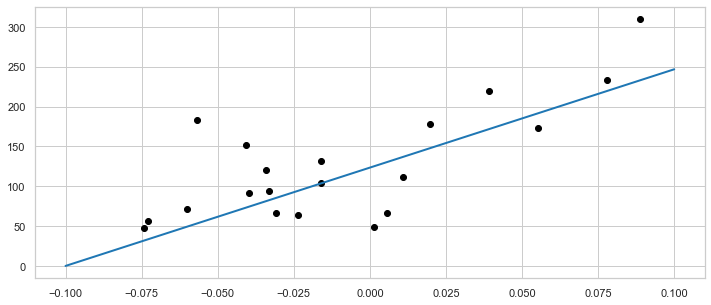

In [12]:
from sklearn.linear_model import LinearRegression

# Crear modelo regresion lineal
regr = LinearRegression()

# Entrear
regr.fit(diabetes_X_train, diabetes_y_train)

# Obtener modelo
print('a1 es: \n', regr.coef_)
print('a0 es: \n', regr.intercept_)

# Plot 
plt.scatter(diabetes_X_test, diabetes_y_test,  color='black')
plt.plot([-0.1,0.1], [b0, regr.intercept_+regr.coef_[0]*0.1]) # linia regresión

Une vez obtenido el modelo también podemos hacer predicciones directamente:

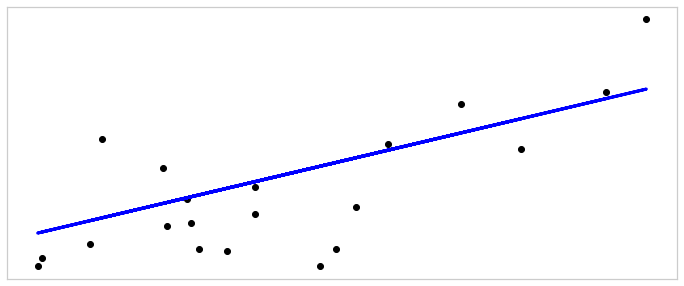

In [13]:
# Hacer predicciones
diabetes_y_pred = regr.predict(diabetes_X_test)

# Plot 
plt.scatter(diabetes_X_test, diabetes_y_test,  color='black')
plt.plot(diabetes_X_test, diabetes_y_pred, color='blue', linewidth=3)

plt.xticks(())
plt.yticks(())

plt.show()

## 3.Métricas de evaluación

Se puede evaluar el modelo obtenido calculando el **mean squared error** ($MSE$) y el **coeficiente de determinación** $R^2$

El MSE, se calcula como:

$$MSE=\frac{1}{n} \sum_{i=1}^n (\widehat{y}^i-y^i)^2,$$ 

El coeficiente $R^2$ se define 
$$(1 - \textbf{u}/\textbf{v})$$, donde $\textbf{u}$ es la suma de los cuadrados de los errores: $$\textbf{u}=\sum (\textbf{y} - \widehat{\textbf{y}} )^2$$ 
donde ${\textbf{y}}$ son los valores observados y  $\widehat{\textbf{y}}$ los valores de la predicción.

Y $\textbf{v}$ es el total de la suma de los cuadrado: $$\textbf{v}=\sum (\textbf{y} - \bar{\textbf{y}})^2,$$ donde $\bar{\textbf{y}}$ es la media de los datos observados.


En Sklearn, podríamos hacer:

In [14]:
from sklearn.metrics import mean_squared_error, r2_score

print('Mean squared error (MSE): %.2f'
      % mean_squared_error(diabetes_y_test, diabetes_y_pred))
# The coefficient of determination: 1 is perfect prediction
print('Coeficiente de determinación: %.2f'
      % r2_score(diabetes_y_test, diabetes_y_pred))

Mean squared error (MSE): 2548.07
Coeficiente de determinación: 0.47


## 4. Regularización

La regularización penaliza aquellos coeficientes que son muy grandes, reduciendo la complejidad del modelo y puede ser de gran ayuda cuando se tengan problemas de *overfitting*

Para ello, al término a minimizar se añade un termino más. Así, a la suma de los cuadrados de los errores (SSE), ahora el objetivo es minimizar:

$$ \textrm{$argmin$}_{\textbf{w}} \left( \frac{1}{2n}  || X \textbf{w} -  \textbf{y} ||^2_2 + \alpha || \textbf{w}||_p \right)$$
 
donde $||\textbf{w}||_p$ es la $\ell_p$-norma del vector de parámetros.  p = 2 (Ridge) y p = 1 es Lasso.



<center><img src="Figures/regularization_ridge_lasso.png"></center>

https://www.youtube.com/watch?v=Xm2C_gTAl8c

## 5. Visualización

Podemos usar la función ``lmplot()`` de Seaborn para visualizar relaciones lineales de datasets multidimensionales. El input debe ser en *Pandas* .

### Ejemplo 1:  Macroeconomic dataset



In [15]:
import pandas as pd
# Read data
df = pd.read_csv('http://vincentarelbundock.github.io/Rdatasets/csv/datasets/longley.csv', index_col=0)
df.head()

,GNP.deflator,GNP,Unemployed,Armed.Forces,Population,Year,Employed
1947,83.0,234.289,235.6,159.0,107.608,1947,60.323
1948,88.5,259.426,232.5,145.6,108.632,1948,61.122
1949,88.2,258.054,368.2,161.6,109.773,1949,60.171
1950,89.5,284.599,335.1,165.0,110.929,1950,61.187
1951,96.2,328.975,209.9,309.9,112.075,1951,63.221


Macroeconomic data from 1947 to 1962.

Queremos predecir  ('Employed') como respuesta $\textbf{y}$ usando ('GNP') como predictor $\textbf{x}$.



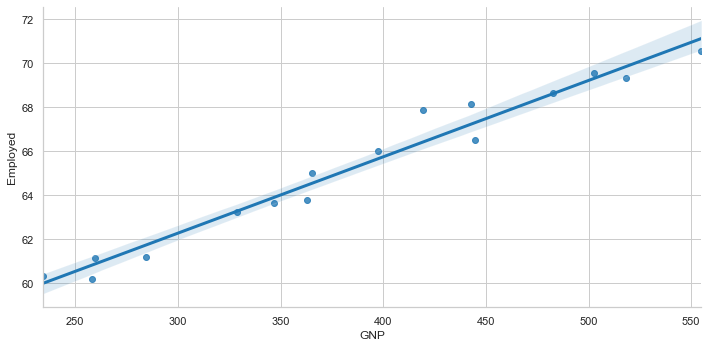

In [16]:
sns.lmplot("GNP", "Employed", df, aspect=2)

Vemos
+ los puntos observador en scatterplot
+ La línia de regresión obtenida con un intervalo de confianza de un 95%.

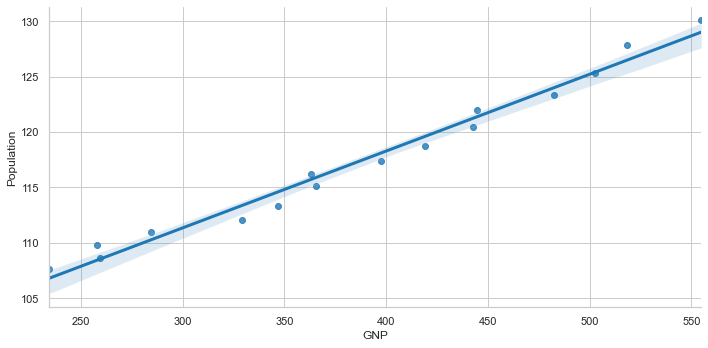

In [17]:
sns.lmplot("GNP", "Population", df, aspect=2);

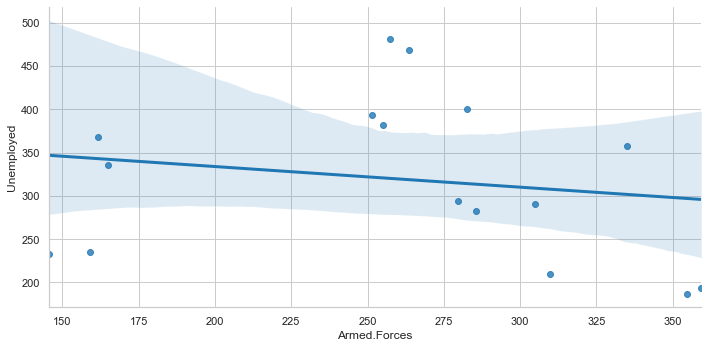

In [18]:
sns.lmplot("Armed.Forces", "Unemployed", df, aspect=2);

Vemos que hay partes poco "lineales".

Pra ello podemos usar la regresión polinomial.



## Multiple Regression and Polynomial Regression




Aunque se llame regresión *lineal*, también podemos adaptar funciones no lineales. La regresión será lineal en sus parámetros no necesariamente en sus predictores. Si se añaden transformaciones no lineales al modelo de regresión lineal, el modelo puede pasar a ser no lineal

$$ \textbf{y} = a_1 \phi(\textbf{x}_1) + \dots + a_m \phi(\textbf{x}_m) $$

Esta técnica se conoce como *Polynomial Regression*, donde cuando más alto sea el grado del polinomio que se aplique más complejo puede ser el modelo (vigilar con overfitting!! i tiempo de cómputo!!)


Por ejemplo, un modelo cúbico:

$$y_i \approx a_0 + a_1 x_i + a_2 x_i^2 + a_3 x_i^3$$

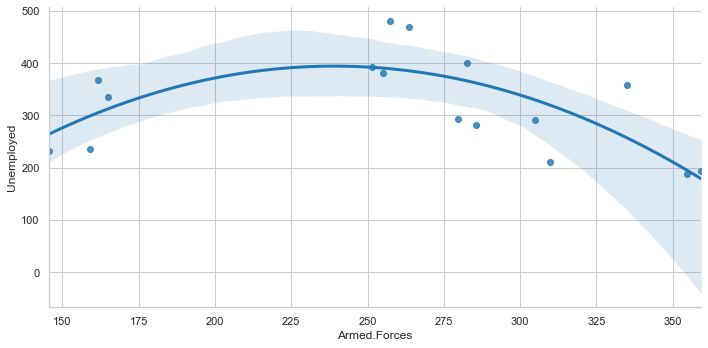

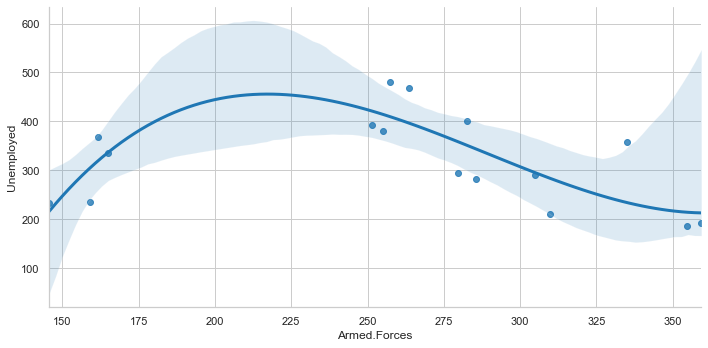

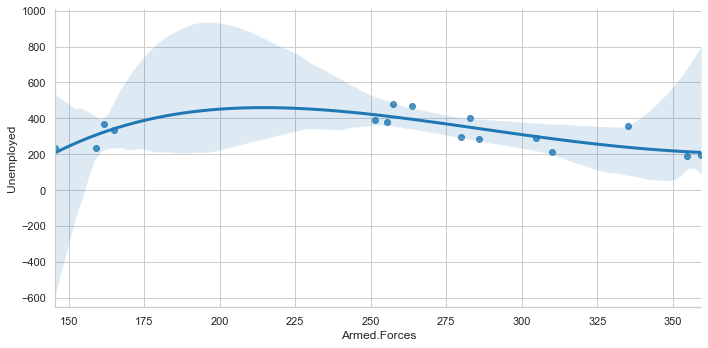

In [19]:
# Increase the order to estimate a polynomial regression
sns.lmplot("Armed.Forces", "Unemployed", df, order=2, aspect=2);
sns.lmplot("Armed.Forces", "Unemployed", df, order=3, aspect=2);
sns.lmplot("Armed.Forces", "Unemployed", df, order=4, aspect=2);


### Ejemplo 2: Housing Data in Boston


Veamos primero rápidamente el dataset

In [20]:
from sklearn import datasets
boston = datasets.load_boston() # Dictionary-like object that exposes its keys as attributes.
X_boston,y_boston = boston.data, boston.target # Create X matrix and y vector from the dataset.
print('Shape of data: {} {}'.format(X_boston.shape, y_boston.shape))

Shape of data: (506, 13) (506,)


506 instances y 13 attributes. 

In [21]:
print('keys: {}'.format(boston.keys()))
print('feature names: {}'.format(boston.feature_names))
print(boston.DESCR)

keys: dict_keys(['data', 'target', 'feature_names', 'DESCR', 'filename'])
feature names: ['CRIM' 'ZN' 'INDUS' 'CHAS' 'NOX' 'RM' 'AGE' 'DIS' 'RAD' 'TAX' 'PTRATIO'
 'B' 'LSTAT']
.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances 

Text(0, 0.5, 'count')

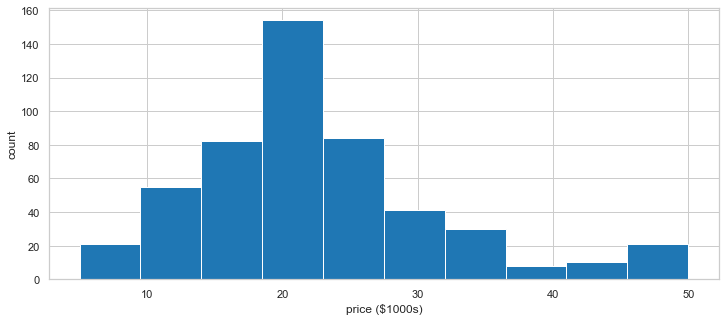

In [22]:
# Precios histograma
plt.hist(y_boston) 
plt.xlabel('price ($1000s)')
plt.ylabel('count')

Usemos solo una característica como por ejemplo, LSTAT, la "proportion of lower status of the population".

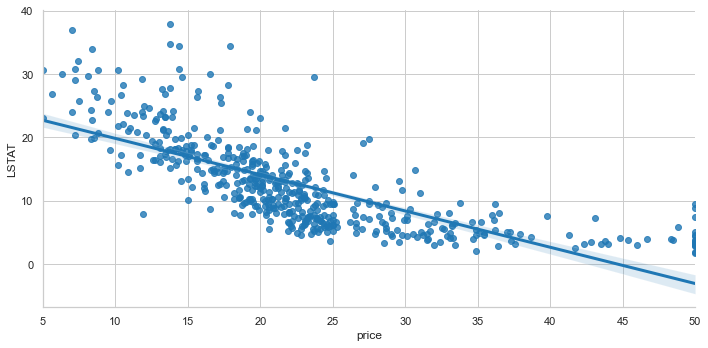

In [23]:
# Visualization of the relations between price and LSTAT
df_boston = pd.DataFrame(boston.data, columns=boston.feature_names)
df_boston['price'] = boston.target
sns.lmplot("price", "LSTAT", df_boston, aspect=2);

Y con otro orden en la función?

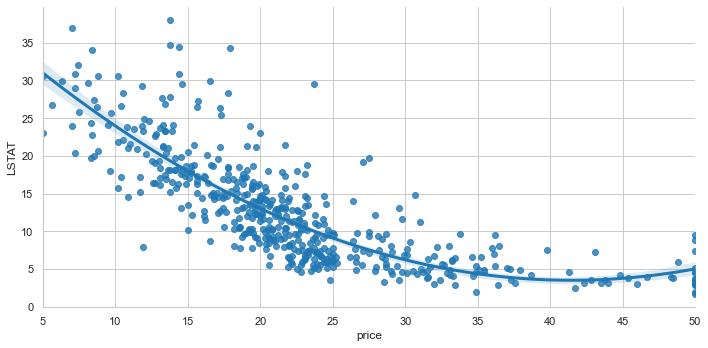

In [24]:
# Estimate a polynomial regression of order 2
sns.lmplot("price", "LSTAT", df_boston, order=2, aspect=2);

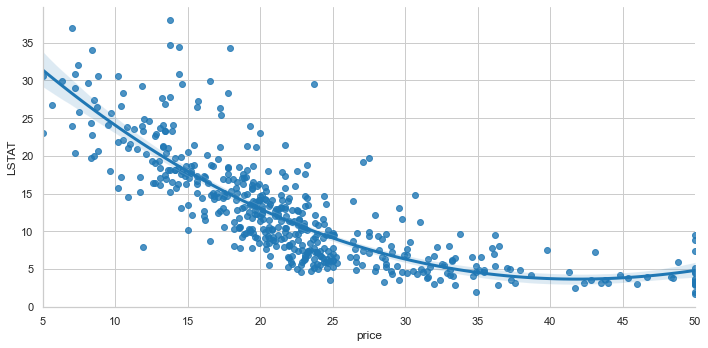

In [25]:
# Estimate a polynomial regression of order 3
sns.lmplot("price", "LSTAT", df_boston, order=3, aspect=2);

Otras variables como el número de habitaciones o l'edad de la casa

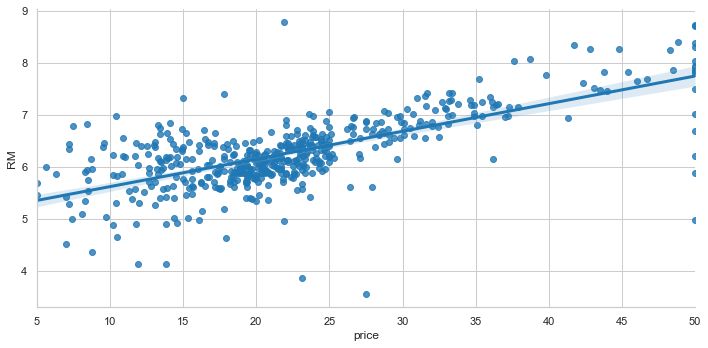

In [26]:
# Visualization of the relations between price and "average number of rooms per dwelling"
sns.lmplot("price", "RM", df_boston, aspect=2);

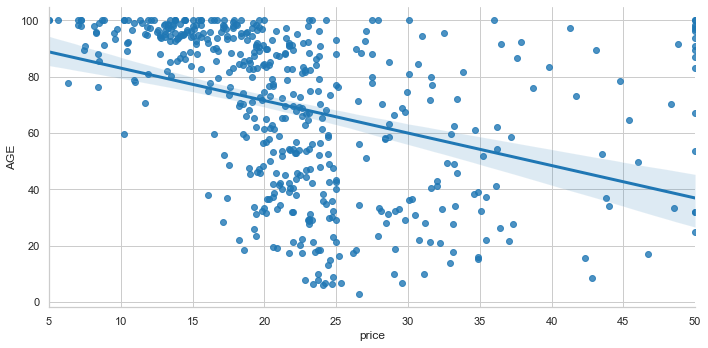

In [27]:
# Visualization of the relations between price and "average number of rooms per dwelling"
sns.lmplot("price", "AGE", df_boston, aspect=2);

### Heatmap

Observemos también correlaciones

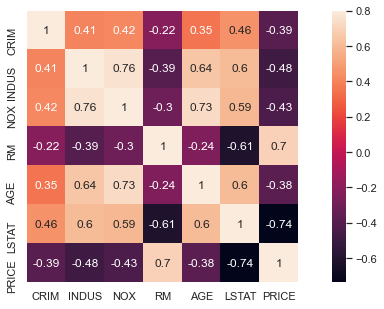

In [28]:
indexes=[0,2,4,5,6,12] # To plot just 7 of the 13 variables: PRICE, LSTAT, AGE, RM, NOX, INDUS, CRIM.
df_boston2 = pd.DataFrame(boston.data[:,indexes], columns=boston.feature_names[indexes])
df_boston2['PRICE'] = boston.target
corrmat = df_boston2.corr()
# Draw the heatmap using seaborn
sns.heatmap(corrmat, vmax=.8, square=True, annot=True)

Vemos que "RM" and "LSTAT" son las variablaes que más explican "Price" 

### Scatter plot matrix

Si escogemos 3 variables

In [29]:
print(boston.feature_names)
indexes3=[5,6,12]
print(boston.feature_names[indexes3])

['CRIM' 'ZN' 'INDUS' 'CHAS' 'NOX' 'RM' 'AGE' 'DIS' 'RAD' 'TAX' 'PTRATIO'
 'B' 'LSTAT']
['RM' 'AGE' 'LSTAT']


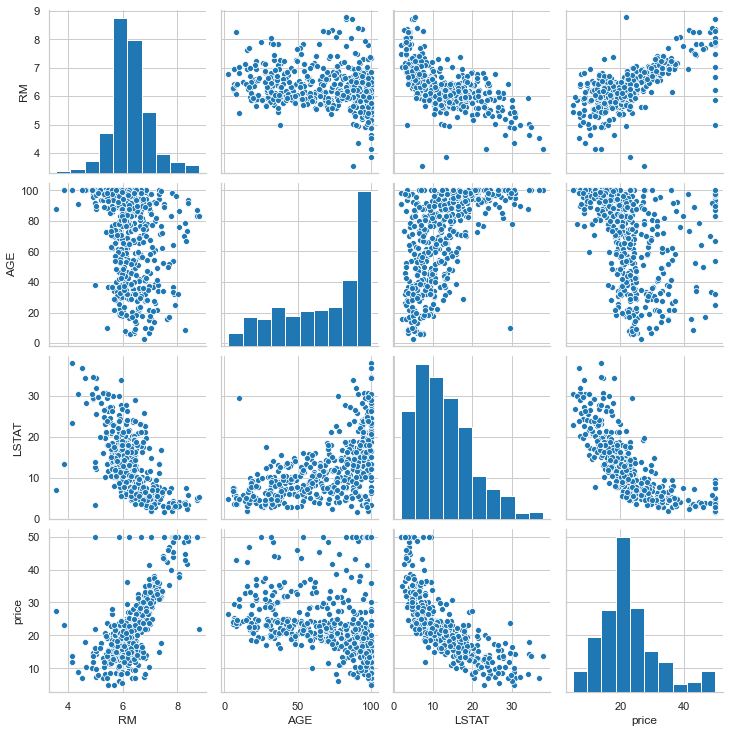

In [30]:
df_boston3 = pd.DataFrame(boston.data[:,indexes3], columns=boston.feature_names[indexes3])
df_boston3['price'] = boston.target
sns.pairplot(df_boston3) # Plot pairwise relationships in the dataset

También se puede hacer en Pandas de la siguiente manera:

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000002BDC7457248>,
      dtype=object)

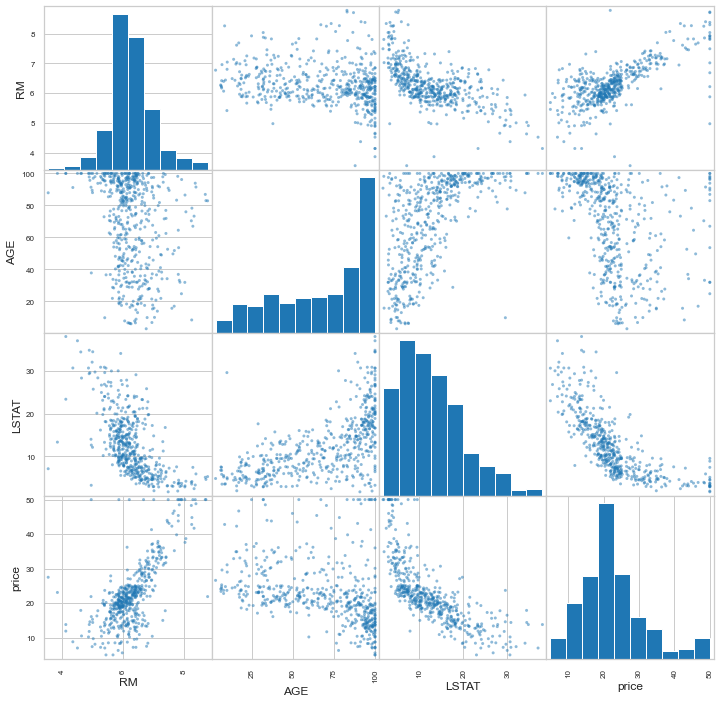

In [31]:
pd.plotting.scatter_matrix(df_boston3, figsize=(12.0,12.0))  

### Ridge ejemplo


In [32]:
train_size = int(X_boston.shape[0]/2) #para ver ué pasa cuando el training set es pequeño (se tiende al overfitting!)
X_train = X_boston[:train_size]
X_test = X_boston[train_size:]
y_train = y_boston[:train_size]
y_test = y_boston[train_size:]
print('Train and test sizes {} {}'.format(X_train.shape, X_test.shape))

regr_boston = LinearRegression()  # Creamos regresión lineal
regr_boston.fit(X_train, y_train) # fitting
print('Coeff and intercept: {} {}'.format(regr_boston.coef_, regr_boston.intercept_))

# Evaluamos
print('Training Score: {}'.format(regr_boston.score(X_train, y_train)))
print('Testing Score: {}'.format(regr_boston.score(X_test, y_test)))
# Compute MSE for training and testing sets 
print('Training MSE: {}'.format(np.mean((regr_boston.predict(X_train) - y_train)**2)))
print('Testing MSE: {}'.format(np.mean((regr_boston.predict(X_test) - y_test)**2)))

Train and test sizes (253, 13) (253, 13)
Coeff and intercept: [ 1.20133313  0.02449686  0.00999508  0.42548672 -8.44272332  8.87767164
 -0.04850422 -1.11980855  0.20377571 -0.01597724 -0.65974775  0.01777057
 -0.11480104] -10.017430582944993
Training Score: 0.8557827200735684
Testing Score: -2.2527343423925448
Training MSE: 9.987517325463743
Testing MSE: 303.4368629265912


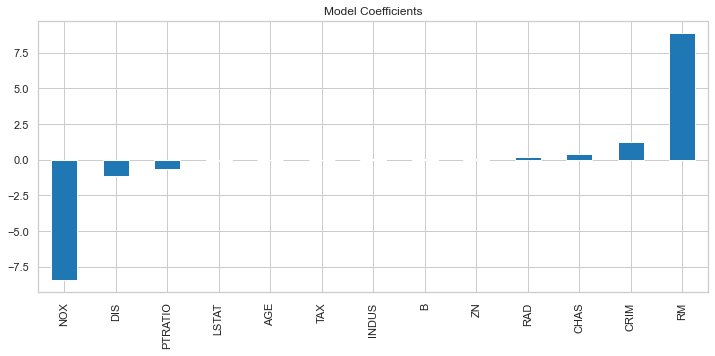

In [33]:
from pandas import Series
coef = Series(regr_boston.coef_, boston.feature_names).sort_values()
coef.plot(kind='bar', title='Model Coefficients')

In [34]:
regr_ridge = linear_model.Ridge(alpha=.3) # Create a Ridge regressor
regr_ridge.fit(X_train, y_train)  # Perform the fitting

Ridge(alpha=0.3)

In [35]:
print('Coeff and intercept: {} {}'.format(regr_ridge.coef_,  regr_ridge.intercept_))

Coeff and intercept: [ 1.02306982e+00  2.46624258e-02 -3.35255156e-04  4.32153462e-01
 -5.44287640e+00  8.87526668e+00 -4.93894389e-02 -1.07418749e+00
  1.98215897e-01 -1.61729094e-02 -6.39546558e-01  1.80886392e-02
 -1.21115342e-01] -11.836790865166382


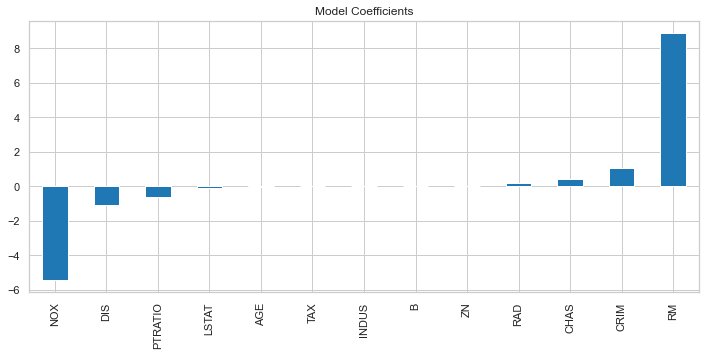

In [36]:
coef = Series(regr_ridge.coef_, boston.feature_names).sort_values()
coef.plot(kind='bar', title='Model Coefficients')

In [37]:
# Compute Score for training and testing sets 
# Best possible score is 1.0, lower values are worse
print('Training Score: {}'.format(regr_ridge.score(X_train, y_train)))
print('Testing Score: {}'.format(regr_ridge.score(X_test, y_test)))
# Compute MSE for training and testing sets 
print('Training MSE: {}'.format(np.mean((regr_ridge.predict(X_train) - y_train)**2)))
print('Test MSE: {}'.format(np.mean((regr_ridge.predict(X_test) - y_test)**2)))

Training Score: 0.8554986478280451
Testing Score: -1.5272153871196825
Training MSE: 10.0071902556098
Test MSE: 235.7555915382107


### Lasso


In [38]:
regr_lasso = linear_model.Lasso(alpha=.3) # Create a Lasso regressor
regr_lasso.fit(X_train, y_train)  # Perform the fitting


Lasso(alpha=0.3)

Coeff and intercept: [ 0.          0.01996512 -0.          0.         -0.          7.69894744
 -0.03444803 -0.79380636  0.0735163  -0.0143421  -0.66768539  0.01547437
 -0.22181817] -6.1832418361484045


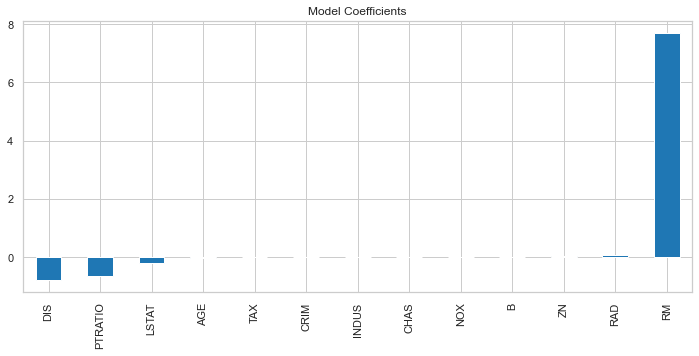

In [39]:
print('Coeff and intercept: {} {}'.format(regr_lasso.coef_,  regr_lasso.intercept_))
coef = Series(regr_lasso.coef_, boston.feature_names).sort_values()
coef.plot(kind='bar', title='Model Coefficients')

In [40]:
# Compute Score for training and testing sets 
# Best possible score is 1.0, lower values are worse
print('Training Score: {}'.format(regr_lasso.score(X_train, y_train)))
print('Testing Score: {}'.format(regr_lasso.score(X_test, y_test)))
# Compute MSE for training and testing sets 
print('Training MSE: {}'.format(np.mean((regr_lasso.predict(X_train) - y_train)**2)))
print('Test MSE: {}'.format(np.mean((regr_lasso.predict(X_test) - y_test)**2)))

# Are the coeficients now sparse?
# Is the score different?

Training Score: 0.8449992039829642
Testing Score: 0.501127529021216
Training MSE: 10.734311009544221
Test MSE: 46.538168094875665


Vemos como el resultado ha mejorado mucho pasando de -2.25 (LR) y -1.52 (Ridge) a 0.50 cuando usamos modelos *sparse*. Esto es debido a que hay  variables que no sirven de nada, solo confunden al regresor.

In [41]:
print(boston.data.shape)
print(boston.target.shape)
print(boston.feature_names)

(506, 13)
(506,)
['CRIM' 'ZN' 'INDUS' 'CHAS' 'NOX' 'RM' 'AGE' 'DIS' 'RAD' 'TAX' 'PTRATIO'
 'B' 'LSTAT']


Con Sklearn también podemos seleccionar las variables más importantes

In [42]:
import sklearn.feature_selection as fs 
selector = fs.SelectKBest(score_func=fs.f_regression,k=5)
X_new = selector.fit(X_train,y_train)
list(zip(selector.get_support(), boston.feature_names)) # Show the selected features

[(False, 'CRIM'),
 (False, 'ZN'),
 (True, 'INDUS'),
 (False, 'CHAS'),
 (False, 'NOX'),
 (True, 'RM'),
 (True, 'AGE'),
 (False, 'DIS'),
 (False, 'RAD'),
 (False, 'TAX'),
 (True, 'PTRATIO'),
 (False, 'B'),
 (True, 'LSTAT')]

Vamos a evaluar el modelo 

Text(0, 0.5, 'Predicted price ($1000s)')

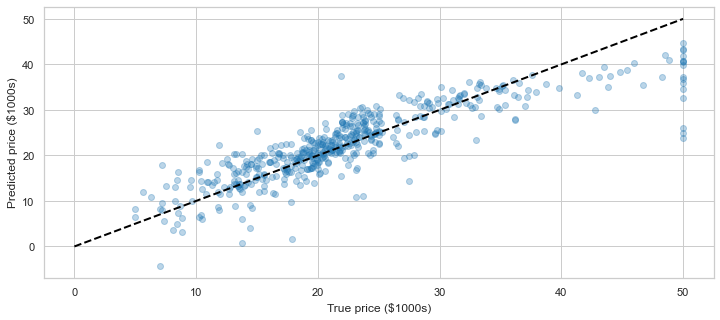

In [43]:
regr_boston_all = LinearRegression() # Create the Linear Regression estimator
regr_boston_all.fit(boston.data, boston.target) # Fitting with all the data (not just the training data) and all the features
predicted = regr_boston_all.predict(boston.data) # Perform prediction of all the data

# Visualization of target and predicted responses of the boston data:
plt.scatter(boston.target, predicted, alpha=0.3)
plt.plot([0, 50], [0, 50], '--k')
plt.axis('tight')
plt.xlabel('True price ($1000s)')
plt.ylabel('Predicted price ($1000s)')

Text(0.5, 1.0, 'Residual plot')

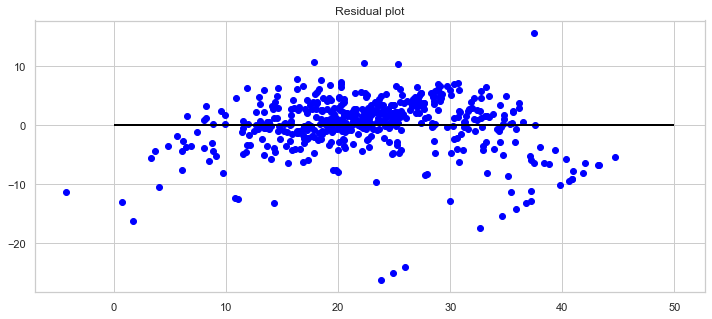

In [44]:
x_plot = plt.scatter(predicted, (predicted - boston.target), c='b')
plt.hlines(y=0, xmin= 0, xmax=50)
plt.title('Residual plot')

Model evaluation:

In [45]:
# Score using a single feature
regr_feat1 = LinearRegression()
for i in np.arange(13):
    feat1=X_train[:,i:i+1]
    regr_feat1.fit(feat1, y_train)    
    print('Feature: {}'.format(boston.feature_names[i]))
    print('Score: {}'.format(regr_feat1.score(feat1, y_train)))

Feature: CRIM
Score: 0.05024843836202264
Feature: ZN
Score: 0.10206594240694711
Feature: INDUS
Score: 0.13068434569181497
Feature: CHAS
Score: 0.00018610373661331892
Feature: NOX
Score: 0.11130139266941119
Feature: RM
Score: 0.7699004053318655
Feature: AGE
Score: 0.11300215206715913
Feature: DIS
Score: 0.018087821597697507
Feature: RAD
Score: 0.0015003535946076507
Feature: TAX
Score: 0.05512205417475469
Feature: PTRATIO
Score: 0.13721073435814335
Feature: B
Score: 0.0463878641534512
Feature: LSTAT
Score: 0.5035503901281464


### Predict and Transform
Hay una opción de ``Estimator`` llamada ``Transformer`` que transforma los datos (elimina variables y crea de nuevas a partir de las que se tienen)

Uno es el ``sklearn.preprocessing.StandardScaler``. Este centra cada feature en ``X`` para tener la media en 0 y una varianza de 1.

In [49]:
y_train.shape

(253, 1)

In [47]:
from sklearn.preprocessing import StandardScaler

scalerX = StandardScaler().fit(X_train) #

y_train2 = np.expand_dims(y_train, axis=1) # Expand the shape of the array from (253,) to (253, 1).
scalery = StandardScaler().fit(y_train2) # Create the transformer StandardScaler and perform the fitting for the target

print("\nBefore transformation:")
print('Training: Max {}, min {}, mean {}, and var {}'.format(np.max(y_train), np.min(y_train), np.mean(y_train), np.var(y_train)))
print('Testing: Max {}, min {}, mean {}, and var {}'.format(np.max(y_test), np.min(y_test), np.mean(y_test), np.var(y_test)))


# Normalization of train and test data using mean and variance of the training:
X_train = scalerX.transform(X_train)
y_train = scalery.transform(y_train2)
X_test = scalerX.transform(X_test)
y_test2 = np.expand_dims(y_test, axis=1)
y_test = scalery.transform(y_test2)

print("\nAfter transformation:")
print('Training: Max {}, min {}, mean {}, and var {}'.format(np.max(y_train), np.min(y_train), np.mean(y_train), np.var(y_train)))
print('Testing: Max {}, min {}, mean {}, and var {}'.format(np.max(y_test), np.min(y_test), np.mean(y_test), np.var(y_test)))


Before transformation:
Training: Max 50.0, min 11.8, mean 24.307509881422927, and var 69.25326375978378
Testing: Max 50.0, min 5.0, mean 20.75810276679842, and var 93.28670311987378

After transformation:
Training: Max 3.0873514853387736, min -1.5029714532177498, mean -2.808469311304744e-16, and var 1.0
Testing: Max 3.0873514853387736, min -2.3200970024895917, mean -0.4265163585480787, and var 1.3470369200714334


También se puede hacer una selección aleatoria del dataset al dividirlo en train y test

## Statistical evaluation

The ``statsmodels`` package provides several different classes that provide different options for linear regression. Getting started with linear regression is quite straightforward with the OLS module.

We can perform the regression of the predictor on the response, using the ``sm.OLS`` class and its initialization ``OLS(y, X)`` method. This method takes as an input two array-like objects: $X$ and $\textbf{y}$. In general, $X$ will either be a numpy array or a pandas data frame with shape ``(n, p)`` where $n$ is the number of data points and $p$ is the number of predictors. $\textbf{y}$ is either a one-dimensional numpy array or a pandas series of length $n$.

In [52]:
import statsmodels.api as sm
X2 = X_boston[:,12] # Let's use column 12 (LSTAT) to perform a regression:
X12 = sm.add_constant(X2)  # Adds a constant term to the predictor
est = sm.OLS(y_boston, X2) # Creates an object OLS estimator
est = est.fit()
est.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                      y   R-squared (uncentered):                   0.449
Model:                            OLS   Adj. R-squared (uncentered):              0.448
Method:                 Least Squares   F-statistic:                              410.9
Date:                Fri, 10 Jul 2020   Prob (F-statistic):                    2.71e-67
Time:                        16:23:57   Log-Likelihood:                         -2182.4
No. Observations:                 506   AIC:                                      4367.
Df Residuals:                     505   BIC:                                      4371.
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1             1.1221      0.055     20.271      0.000       1.013       1.231
==============================================================================
Omnibus:                        1.113   Durbin-Watson:                   0.369
Prob(Omnibus):                  0.573   Jarque-Bera (JB):                1.051
Skew:                           0.112   Prob(JB):                        0.591
Kurtosis:                       3.009   Cond. No.                         1.00
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""